In [2]:
import numpy as numpy
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("stud.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are duplicates values in the data set

Check duplicates

In [6]:
df.duplicated().sum()

0

There are no duplicates

In [7]:
# check null values and Dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
## Checking the number of unique values in each column

df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
## Check statistics of data set
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight

 * From above description of numerical data,all means are very close to each other - beteen 66 and 68.05
 * All standard deviations are also close - between 14.6 and 15.19;
 * hile there is a minimum score 0 for math , for writing minimum is much higher = 10 and for readin myet higher = 17

In [10]:
## Exploring data

print("Categories in gender variable:     ",end=" ")
print(df['gender'].unique())

print("Categories in race_ethnicity variable:    ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:   ",end=" ")
print(df['parental level of education'].unique())

print("Categories in lunch variable:       ",end=" ")
print(df['lunch'].unique())

print("Categories in test preparation course", end=" ")
print(df['test preparation course'].unique())

Categories in gender variable:      ['female' 'male']
Categories in race_ethnicity variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:        ['standard' 'free/reduced']
Categories in test preparation course ['none' 'completed']


In [14]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print("We have {} numerical features: {}".format(len(numeric_features), numeric_features))
print("\nWe have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']

We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [15]:
# Adding columns for "Total score" and "average"
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3

In [16]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [18]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20= df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 in Maths: {math_less_20}')
print(f'Number of students with less than 20 in Writing: {writing_less_20}')
print(f'Number of students with less than 20 in Reading: {reading_less_20}')


Number of students with less than 20 in Maths: 4
Number of students with less than 20 in Writing: 3
Number of students with less than 20 in Reading: 1


Insights
  * From above values we get students have performed the worst in Maths
  * Best performance is in reading section

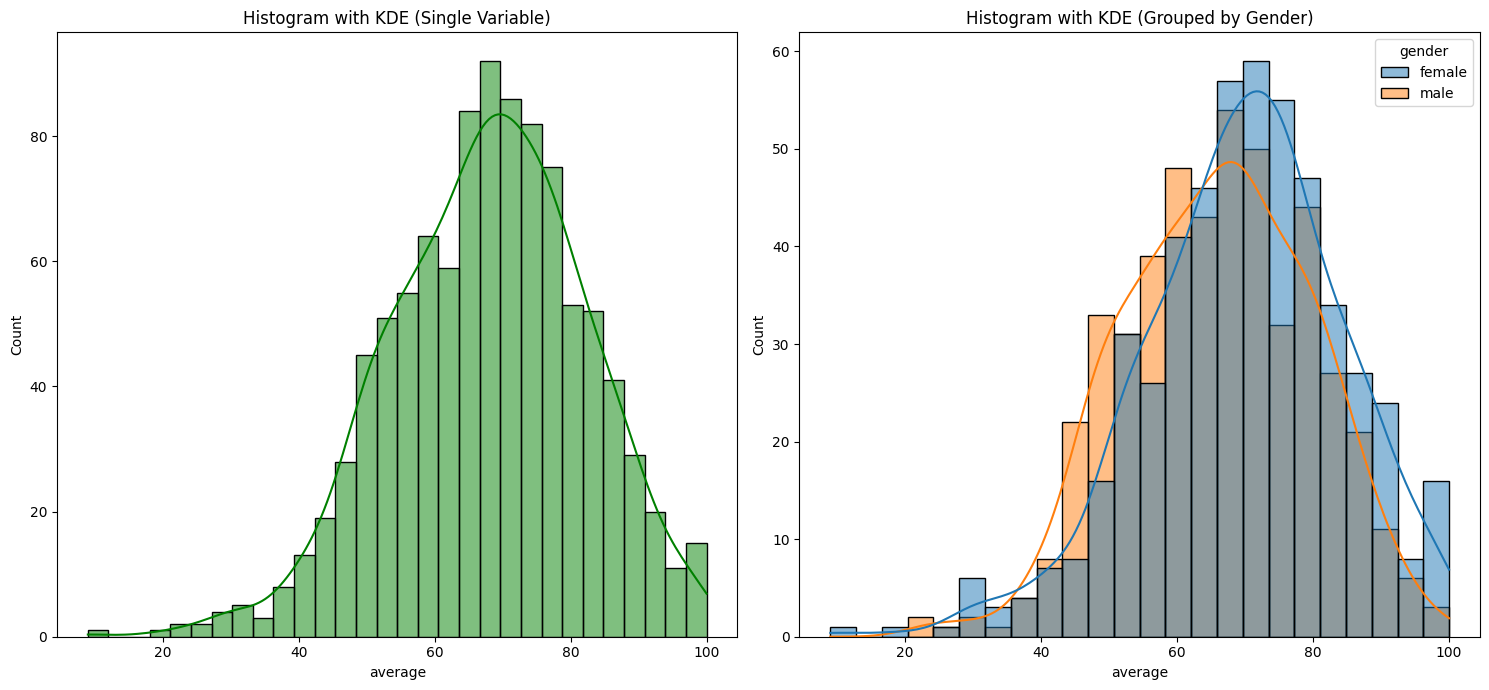

In [20]:
# Histograms and KDE
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot histogram with KDE on the first subplot
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title("Histogram with KDE (Single Variable)")

# Plot histogram with KDE and hue on the second subplot
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])
axs[1].set_title("Histogram with KDE (Grouped by Gender)")

plt.tight_layout()
plt.show()